In [1]:
# Imports

import matplotlib.pyplot as plt
from src.utils.battery.parameter_calculation import battery_capital_costs

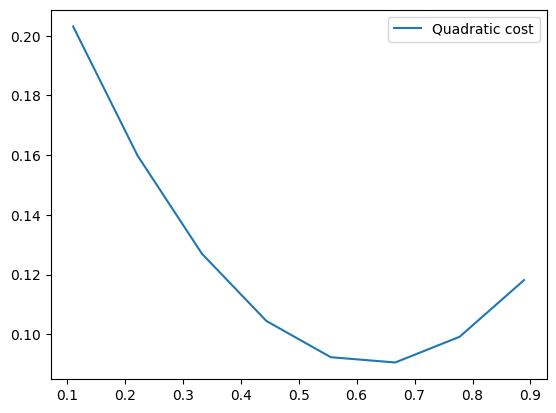

In [2]:
# Experiment with costs

capital_cost = 0.42
maximum_capacity = 1.0
current_soc = 1.0

soc_target = 0.63

quadratic_charge_cost = 6.5e-3

efficiency_charge = 0.9

efficiency_discharge = 0.9

costs = []
socs = []

for i in range(10):
    p_charge = 0
    p_discharge = 0.1

    # Update current_soc
    current_soc = current_soc + p_charge * efficiency_charge - \
                  p_discharge / efficiency_discharge

    # SOC cannot be negative
    if current_soc < 0:
        break

    socs.append(current_soc)

    costs.append(battery_capital_costs(capital_cost, maximum_capacity,
                                       soc_target, quadratic_charge_cost,
                                       current_soc,
                                       p_charge, p_discharge,
                                       efficiency_charge,
                                       efficiency_discharge))

plt.plot(socs, costs)
plt.legend(['Quadratic cost'])

plt.show()